<a href="https://colab.research.google.com/github/sangitaGIT011/jupiterpy/blob/main/FML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Load the Uber dataset directly
url = "https://raw.githubusercontent.com/sangitaGIT011/Myproj/refs/heads/main/UberDataset.csv"
data = pd.read_csv(url)

print("Original Data Sample:")
print(data.head())

# Step 1: Handle missing values (if any) in 'Fare' column — or pick a relevant numeric column
if data['MILES'].isnull().sum() > 0:
    imputer = SimpleImputer(strategy='mean')
    data['MILES'] = imputer.fit_transform(data[['MILES']])

# Step 2: Normalize the 'Fare' column
scaler = MinMaxScaler()
data['MILES'] = scaler.fit_transform(data[['MILES']])

print("\nCleaned Data Sample (MILES column):")
print(data[['MILES']].head())



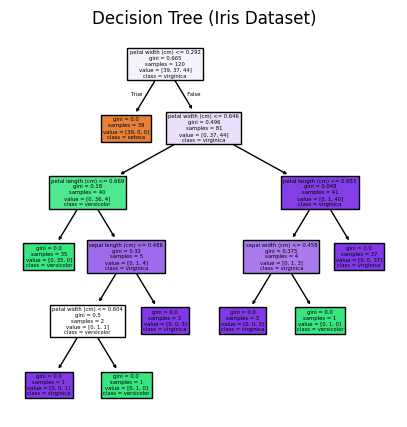

Predicted species: setosa


In [27]:
# Import basic libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Features
y = iris.target                                           # Labels

# Step 2: Normalize (scale) the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# Step 4: Train the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Step 5: Visualize the decision tree
plt.figure(figsize=(5, 5))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree (Iris Dataset)")
plt.show()

# Step 6: Predict a new flower sample
# Use a DataFrame with same column names as original data to avoid warning
new_data = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=iris.feature_names)
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)

# Step 7: Show result
print("Predicted species:", iris.target_names[prediction[0]])


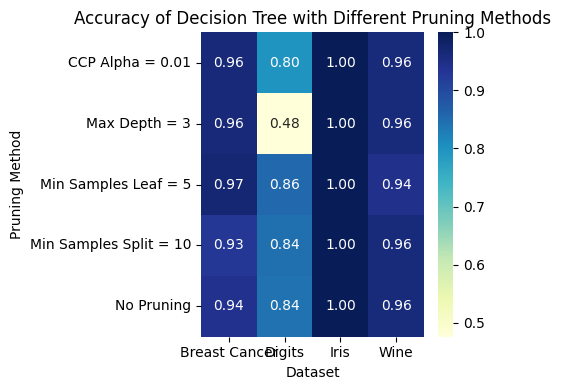

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns

# Load datasets
datasets = {
    "Iris": load_iris(),
    "Wine": load_wine(),
    "Breast Cancer": load_breast_cancer(),
    "Digits": load_digits(),
}

# Pruning parameter sets
pruning_configs = {
    "No Pruning": {},
    "Max Depth = 3": {"max_depth": 3},
    "Min Samples Split = 10": {"min_samples_split": 10},
    "Min Samples Leaf = 5": {"min_samples_leaf": 5},
    "CCP Alpha = 0.01": {"ccp_alpha": 0.01},
}

# To store results
results = []

# Loop over datasets and pruning configs
for dataset_name, dataset in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3, random_state=42)

    for config_name, params in pruning_configs.items():
        clf = DecisionTreeClassifier(random_state=42, **params)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        results.append({
            "Dataset": dataset_name,
            "Pruning": config_name,
            "Accuracy": accuracy
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Pivot for visualization
pivot_df = results_df.pivot(index="Pruning", columns="Dataset", values="Accuracy")

# Plot comparison chart
plt.figure(figsize=(5, 4))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Accuracy of Decision Tree with Different Pruning Methods")
plt.ylabel("Pruning Method")
plt.xlabel("Dataset")
plt.tight_layout()
plt.show()


In [33]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load text data (2 categories for simplicity)
data = fetch_20newsgroups(subset='all', categories=['sci.space', 'comp.graphics'])
X_text, y = data.data, data.target

# Convert text to numbers (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(X_text)

# Function to evaluate model
def evaluate(model):
    y_pred = cross_val_predict(model, X, y, cv=10)
    print("Accuracy:", accuracy_score(y, y_pred))
    print("Precision:", precision_score(y, y_pred))
    print("Recall:", recall_score(y, y_pred))
    print("F1 Score:", f1_score(y, y_pred))
    print("-" * 30)

# Without pruning
print("Without Pruning:")
model1 = DecisionTreeClassifier()
evaluate(model1)

# With pruning (limit tree depth)
print("With Pruning:")
model2 = DecisionTreeClassifier(max_depth=10)
evaluate(model2)


Without Pruning:
Accuracy: 0.9040816326530612
Precision: 0.9023162134944612
Recall: 0.9078014184397163
F1 Score: 0.9050505050505051
------------------------------
With Pruning:
Accuracy: 0.8831632653061224
Precision: 0.8812877263581489
Recall: 0.8875379939209727
F1 Score: 0.8844018172640081
------------------------------


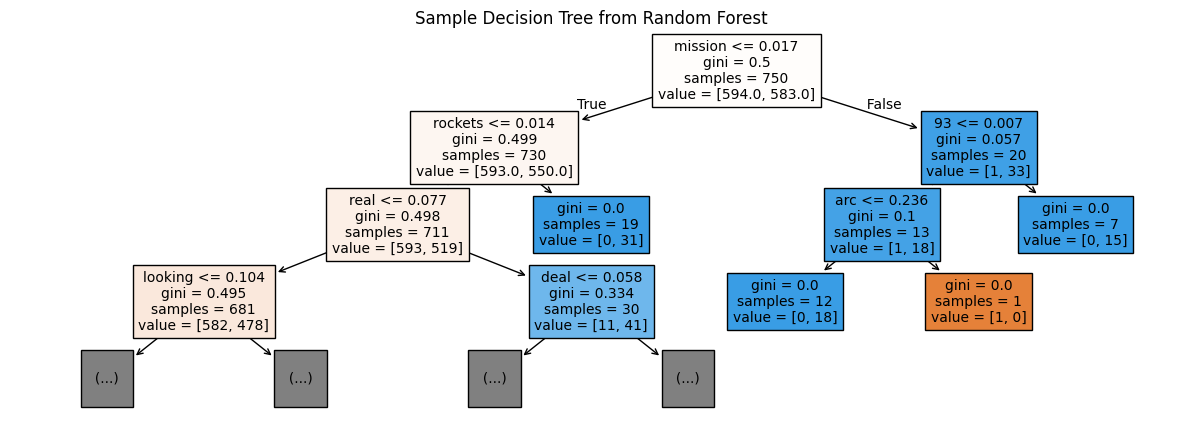

Predicted class: sci.space


In [39]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load cleaned dataset (2 categories for simplicity)
data = fetch_20newsgroups(subset='train', categories=['sci.space', 'comp.graphics'], remove=('headers', 'footers', 'quotes'))
X_text, y = data.data, data.target

# Convert text to features
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(X_text)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X, y)

# Visualize one tree from the forest
plt.figure(figsize=(15, 5))
plot_tree(rf.estimators_[0], max_depth=3, fontsize=10, feature_names=vectorizer.get_feature_names_out(), filled=True)
plt.title("Sample Decision Tree from Random Forest")
plt.show()

# Classify a new sample
new_sample = ["NASA discovered a new planet in space."]
new_X = vectorizer.transform(new_sample)
prediction = rf.predict(new_X)
print("Predicted class:", data.target_names[prediction[0]])
